In [551]:
import numpy as np
import matplotlib.pyplot as plt

# Define Gradients and Hessians

In [552]:
def gradEs(xk, yk, xkp1, ykp1, l_k, k):
    """
    Calculate the gradient of the stretching energy with respect to the coordinates.

    Args:
    - xk (float): x coordinate of the current point
    - yk (float): y coordinate of the current point
    - xkp1 (float): x coordinate of the next point
    - ykp1 (float): y coordinate of the next point
    - l_k (float): reference length
    - EA (float): elastic modulus

    Returns:
    - F (np.array): Gradient array
    """
    F = np.zeros(4)
    F[0] = -(1.0 - np.sqrt((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0) / l_k) * ((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0)**(-0.5) / l_k * (-2.0 * xkp1 + 2.0 * xk)
    F[1] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (-0.2e1 * ykp1 + 0.2e1 * yk)
    F[2] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (0.2e1 * xkp1 - 0.2e1 * xk)
    F[3] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (0.2e1 * ykp1 - 0.2e1 * yk)

    F = 0.5 * k * l_k * F  # Scale by k and l_k

    return F

In [553]:
def hessEs(xk, yk, xkp1, ykp1, l_k, k):
    """
    This function returns the 4x4 Hessian of the stretching energy E_k^s with
    respect to x_k, y_k, x_{k+1}, and y_{k+1}.
    """
    J = np.zeros((4, 4))  # Initialize the Hessian matrix
    J11 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * xkp1 + 2 * xk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((-2 * xkp1 + 2 * xk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J12 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * ykp1 + 2 * yk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (-2 * ykp1 + 2 * yk) / 0.2e1
    J13 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (2 * xkp1 - 2 * xk) / 0.2e1 + 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J14 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (2 * ykp1 - 2 * yk) / 0.2e1
    J22 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * ykp1 + 2 * yk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((-2 * ykp1 + 2 * yk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J23 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) * (-2 * ykp1 + 2 * yk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * ykp1 + 2 * yk) * (2 * xkp1 - 2 * xk) / 0.2e1
    J24 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (-2 * ykp1 + 2 * yk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * ykp1 + 2 * yk) * (2 * ykp1 - 2 * yk) / 0.2e1 + 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J33 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((2 * xkp1 - 2 * xk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J34 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (2 * xkp1 - 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (2 * xkp1 - 2 * xk) * (2 * ykp1 - 2 * yk) / 0.2e1
    J44 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((2 * ykp1 - 2 * yk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k

    J = np.array([[J11, J12, J13, J14],
                   [J12, J22, J23, J24],
                   [J13, J23, J33, J34],
                   [J14, J24, J34, J44]])

    J *= 0.5 * k * l_k

    return J

# Write Nodes and Properties to Files

In [554]:
%%writefile nodes.txt
0, 0
1, 0
2, 0
1, -1

Overwriting nodes.txt


In [555]:
%%writefile springs.txt
0, 1, 10
1, 2, 20
2, 3, 5
3, 0, 5

Overwriting springs.txt


# Read the nodes, springs, and properties

In [556]:
nodes_file_path = 'nodes.txt'
node_coordinates = []

try:
    with open(nodes_file_path, 'r') as f:
        for line in f:
            # Split each line by comma and remove leading/trailing whitespace
            parts = [part.strip() for part in line.split(',')]
            # Assuming the format is node number, x, y
            # We only need x and y, which are the second and third elements (index 1 and 2)
            if len(parts) == 2:
                try:
                    x = float(parts[0])
                    y = float(parts[1])
                    node_coordinates.append([x, y])
                except ValueError:
                    print(f"Skipping line due to non-numeric coordinates: {line.strip()}")
            else:
                print(f"Skipping line due to incorrect format: {line.strip()}")

    # Convert the list of coordinates to a NumPy array
    node_matrix = np.array(node_coordinates)

    print("Node coordinates successfully loaded into a numpy matrix.")
    display(node_matrix)

except FileNotFoundError:
    print(f"Error: The file '{nodes_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Node coordinates successfully loaded into a numpy matrix.


array([[ 0.,  0.],
       [ 1.,  0.],
       [ 2.,  0.],
       [ 1., -1.]])

In [557]:
springs_file_path = 'springs.txt'
index_info = []
stiffness_info = []

try:
    with open(springs_file_path, 'r') as f:
        for line in f:
            # Split each line by comma and remove leading/trailing whitespace
            parts = [part.strip() for part in line.split(',')]
            # Assuming the format is spring number, first node, second node, stiffness
            if len(parts) == 3:
                try:
                    first_node_index = float(parts[0])
                    second_node_index = float(parts[1])
                    stiffness = float(parts[2])
                    index_info.append([2*first_node_index, 2*first_node_index+1, 2*second_node_index, 2*second_node_index+1])
                    stiffness_info.append(stiffness)
                except ValueError:
                    print(f"Skipping line due to non-numeric coordinates: {line.strip()}")
            else:
                print(f"Skipping line due to incorrect format: {line.strip()}")

    # Convert the list of coordinates to a NumPy array
    index_matrix = np.array(index_info)
    stiffness_matrix = np.array(stiffness_info)

    print("Spring indices successfully loaded into a numpy matrix.")
    display(index_matrix)

    print("Spring stiffnesses successfully loaded into a numpy matrix.")
    display(stiffness_matrix)

except FileNotFoundError:
    print(f"Error: The file '{springs_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Spring indices successfully loaded into a numpy matrix.


array([[0., 1., 2., 3.],
       [2., 3., 4., 5.],
       [4., 5., 6., 7.],
       [6., 7., 0., 1.]])

Spring stiffnesses successfully loaded into a numpy matrix.


array([10., 20.,  5.,  5.])

# Equations of motion and Jacobian

In [558]:
def getFexternal(m):

  # Input: mass (m) is a vector of size ndof ( = 2 times number of nodes)
  # Output: weight (W) is a vector of same size

  W = np.zeros_like(m)
  for i in range(len(m) // 2 ):
    W[2 * i] = 0.0 #x-coord
    W[2 * i + 1] = m[2 * i + 1] * (-9.8) #y-coord
  return W

In [559]:
def getForceJacobian(x_new, x_old, u_old, stiffness_matrix, index_matrix, m, dt, l_k):

  ndof = x_new.shape[0]

  # Inertia
  f_inertia = m/dt * ((x_new - x_old)/dt - u_old)
  J_inertia = np.diag(m) / (dt ** 2)

  # Spring
  f_spring = np.zeros_like(x_new)
  J_spring = np.zeros((ndof,ndof))
  for i in range(stiffness_matrix.shape[0]):
    ind = index_matrix[i].astype(int)
    xi = x_new[ind[0]]
    yi = x_new[ind[1]]
    xj = x_new[ind[2]]
    yj = x_new[ind[3]]
    stiffness = stiffness_matrix[i]
    f_spring[ind] += gradEs(xi, yi, xj, yj, l_k[i], stiffness)
    J_spring[np.ix_(ind, ind)] += hessEs(xi, yi, xj, yj, l_k[i], stiffness)

  # External force
  f_ext = getFexternal(m)
  J_ext = np.zeros((ndof,ndof))

  f = f_inertia + f_spring - f_ext
  J = J_inertia + J_spring - J_ext

  return f, J

# Preparation at t = 0

In [561]:
N = node_matrix.shape[0] # Number of nodes
ndof = 2 * N # Number of degrees of freedom

# Initialize positions, velocities, and accelerations
x_old = np.zeros(ndof)
u_old = np.zeros(ndof)
a_old = np.zeros(ndof)

# Build the position (DOF) vector. Velocity and acceleration remains zero
for i in range(N):
  x_old[2*i] = node_matrix[i][0]
  x_old[2*i+1] = node_matrix[i][1]

# Every spring has a rest length
l_k = np.zeros_like(stiffness_matrix)
for i in range(stiffness_matrix.shape[0]):
  ind = index_matrix[i].astype(int)  # Convert indices to integers
  xi = x_old[ind[0]]
  yi = x_old[ind[1]]
  xj = x_old[ind[2]]
  yj = x_old[ind[3]]
  l_k[i] = np.sqrt((xj - xi)**2 + (yj - yi)**2)


**Mass and Weight**

In [562]:
# Mass
m = np.zeros(ndof)
for i in range(ndof):
  m[i] = 1.0

# Weight
W = getFexternal(m)

# Simulation Loop

**Simulate/integrate function**

In [563]:
# Integrator for Implicit Method
def myInt(t_new, x_old, u_old, free_DOF, stiffness_matrix, index_matrix, m, dt):

  # Guess solution for x_new
  x_new = x_old.copy() # Start with a copy of x_old as the initial guess

  eps = 1.0e-6 # tolerance
  err = eps * 100  # initialize to a large value

  # Newton-Raphson method
  while err > eps:
    f, J = getForceJacobian(x_new, x_old, u_old, stiffness_matrix, index_matrix, m, dt, l_k)

    # Extract free DOFs
    J_free = J[np.ix_(free_DOF, free_DOF)]
    f_free = f[free_DOF]

    # Solve for deltaX of free DOFs
    deltaX_free = np.linalg.solve(J_free, f_free)

    # Construct full deltaX vector
    deltaX = np.zeros_like(x_new)
    deltaX[free_DOF] = deltaX_free

    # Update x_new
    x_new = x_new - deltaX

    # Calculate error based on the force in free DOFs
    err = np.linalg.norm(f_free)

  u_new = (x_new - x_old) / dt

  return x_new, u_new

**Plotting Function**

In [565]:
def plot(x, index_matrix, t):

  plt.figure() # Create a new figure for each plot
  plt.title(f'Time: {t:.2f} second') # Add a title with the current time
  for i in range(index_matrix.shape[0]): #ALl springs
    ind = index_matrix[i].astype(int)  # Convert indices to integers
    xi = x[ind[0]]
    yi = x[ind[1]]
    xj = x[ind[2]]
    yj = x[ind[3]]
    plt.plot([xi, xj], [yi, yj], 'bo-') # Plot a blue line with circles at the nodes
  plt.xlabel('x')
  plt.ylabel('y')
  plt.axis('equal') # Ensure equal scaling for x and y axes
  plt.grid(True)
  plt.show()

**Main Simulation Loop**

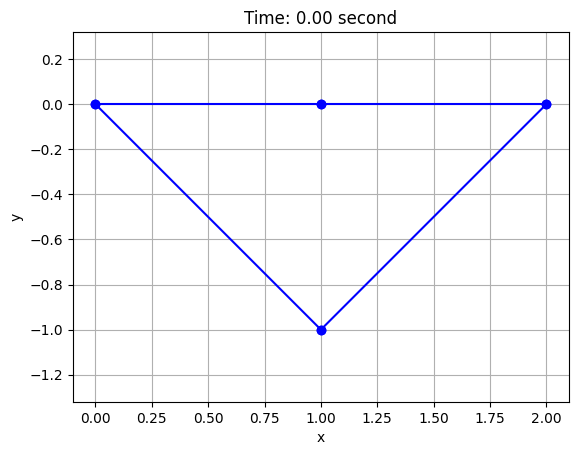

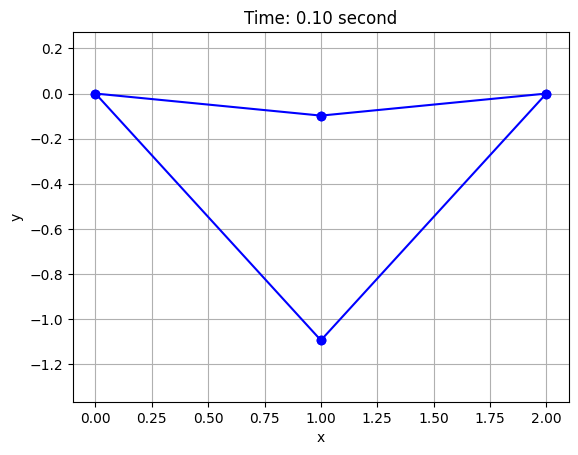

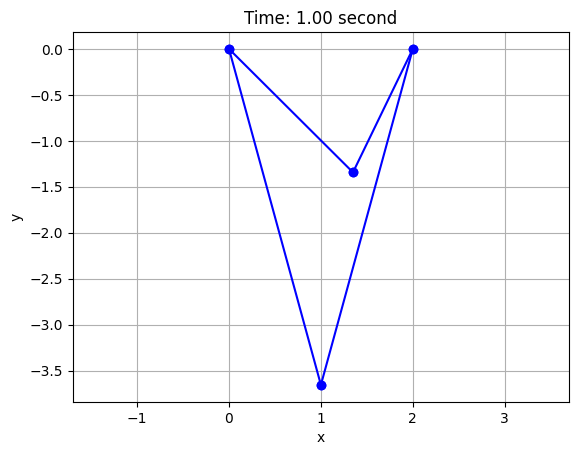

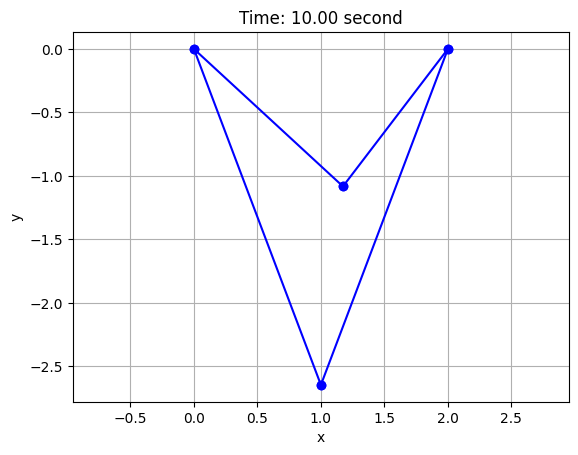

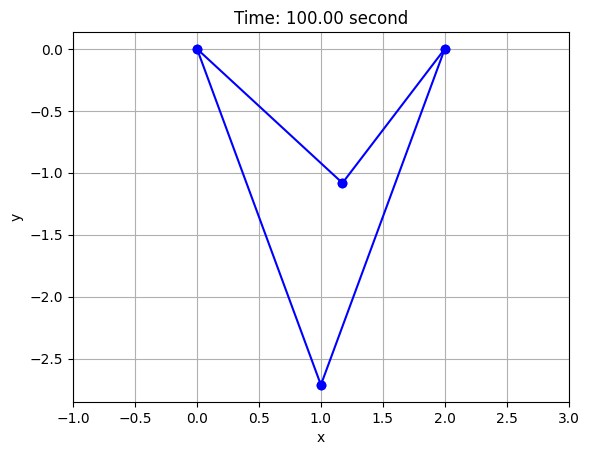

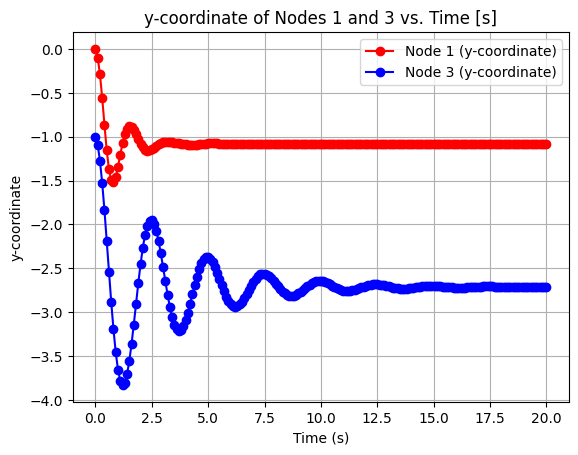

In [566]:
dt = 0.1 # Time step size
maxTime = 100   # total time of simulation
t = np.arange(0, maxTime + dt, dt)

# Initialize positions, velocities, and accelerations
# We will work with copies inside the loop
x_initial = x_old.copy()
u_initial = u_old.copy()
a_initial = a_old.copy()

# free indices
# The total degrees of freedom are 8 (2*N).
# The indices for the nodes are:
# Node 0: 0, 1
# Node 1: 2, 3
# Node 2: 4, 5
# Node 3: 6, 7
# We want to fix nodes 0 and 2, so we exclude indices 0, 1, 4, and 5 from the free_DOF.
free_DOF = np.array([2, 3, 6, 7])

# Desired plot times for shapes
plot_times_shapes = np.array([0, 0.1, 1, 10, 100])
plotted_times_shapes = [] # Keep track of times already plotted for shapes

# Plot initial state at t=0
plot(x_initial, index_matrix, t[0])
plotted_times_shapes.append(t[0])


# Container to store y-coordinate of free nodes
y_node1 = np.zeros(len(t))
y_node3 = np.zeros(len(t))
y_node1[0] = x_initial[3] # y-coordinate of node 1
y_node3[0] = x_initial[7]

# Create variables to be updated within the loop
x_current = x_initial.copy()
u_current = u_initial.copy()

for k in range(len(t)-1):
  t_new = t[k+1]

  # Use x_current and u_current in the integration function
  x_next, u_next = myInt(t_new, x_current, u_current, free_DOF, stiffness_matrix, index_matrix, m, dt)

  # Check if current time is close to any of the desired plot times for shapes and hasn't been plotted yet
  if any(np.isclose(t_new, plot_times_shapes)) and t_new not in plotted_times_shapes:
      plot(x_next, index_matrix, t_new)
      plotted_times_shapes.append(t_new)


  y_node1[k+1] = x_next[3]
  y_node3[k+1] = x_next[7]

  # Update the current state for the next iteration
  x_current = x_next
  u_current = u_next

# Plot y-coordinates up to 20 seconds
plt.figure()
# Find the index corresponding to 20 seconds
index_20s = np.where(np.isclose(t, 20))[0][0]
plt.plot(t[:index_20s+1], y_node1[:index_20s+1], 'ro-', label='Node 1 (y-coordinate)')
plt.plot(t[:index_20s+1], y_node3[:index_20s+1], 'bo-', label='Node 3 (y-coordinate)')
plt.xlabel('Time (s)')
plt.ylabel('y-coordinate')
plt.title('y-coordinate of Nodes 1 and 3 vs. Time [s]')
plt.grid(True)
plt.legend() # Add a legend to the plot
plt.show()